# Page View Time Series Visualizer

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Reading csv file to bring in data

In [3]:
df =pd.read_csv('fcc-forum-pageviews.csv',header=[0],index_col=0,parse_dates=True)

## Cleaning the data

In [15]:
df = df[(df.value >= (df.value.quantile(0.025))) & (df.value <= (df.value.quantile(0.975)))]
df.head()

,value
date,
2016-06-17,21691
2016-06-18,21681
2016-06-20,28508
2016-06-21,26805
2016-06-25,21923


## Line Plot (Date vs Page Views)

Text(0, 0.5, 'Page Views')

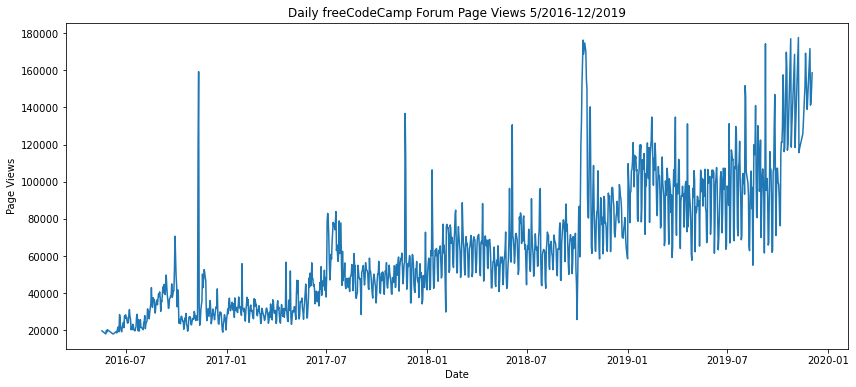

In [6]:
plt.figure(figsize=(14,6))
  
  
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
fig = sns.lineplot(data=df, x=df.index, y='value').figure
plt.xlabel("Date")
plt.ylabel("Page Views")

## Bar Plot (Year vs Average Plot Views)

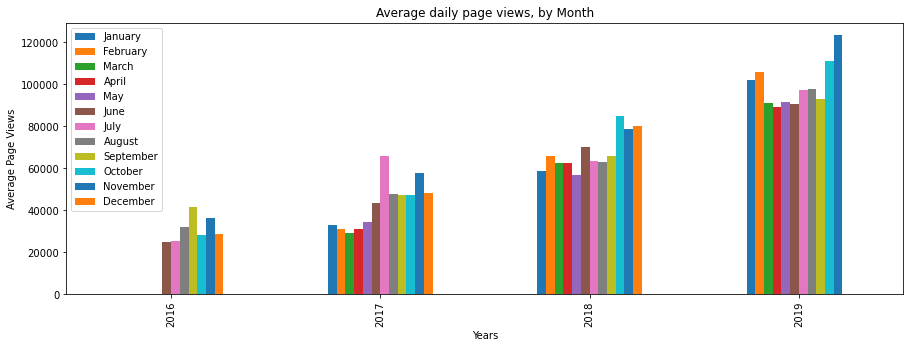

In [19]:
df_bar = df.copy()
    
df_bar['Year'] = df.index.year
df_bar['Month'] = df.index.month
df_bar_ave=df_bar.groupby(['Year', 'Month']).mean().unstack()
months = ['January', 'February', 'March', 'April' , 'May' , 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    # Draw bar plot
fig = df_bar_ave.plot(kind ="bar", figsize=(15,5)).figure
plt.title("Average daily page views, by Month")
plt.xlabel("Years")
plt.ylabel("Average Page Views")
plt.legend(fontsize =10, labels=months)

## Box Plot (Year wise and Month wise)

Text(0, 0.5, 'Page Views')

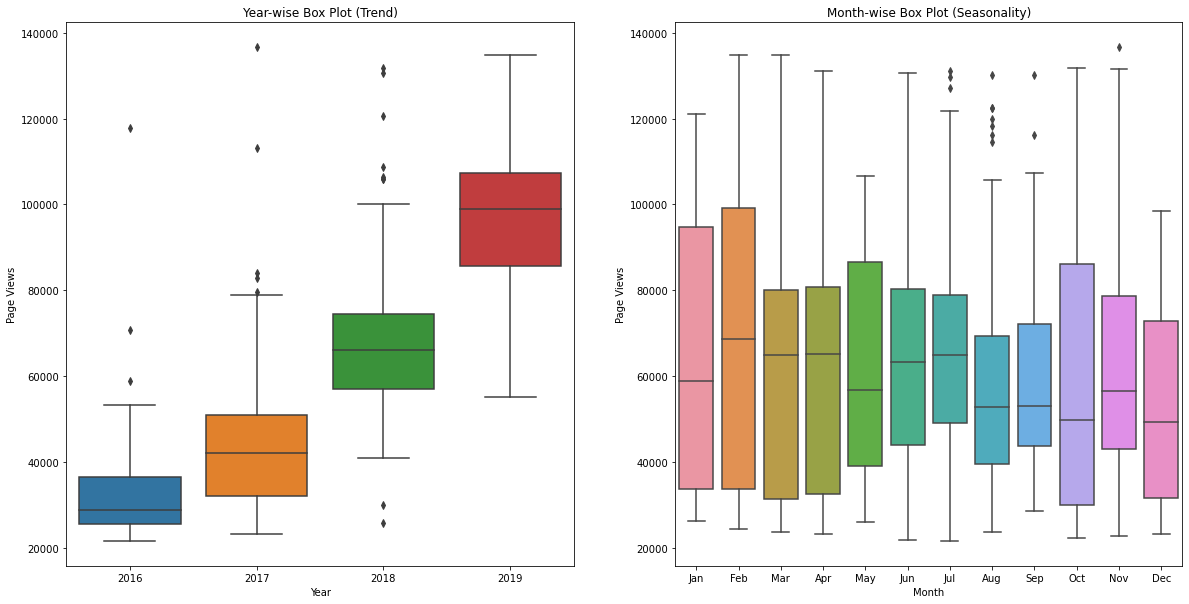

In [18]:
df_box = df.copy()

df_box['year'] = [d.year for d in df_box.index]
df_box['month'] = [d.strftime('%b') for d in df_box.index]

df_box['smonth'] = [d.strftime('%m') for d in df_box.index]

df_box = df_box.sort_values(by='smonth')

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(20)
fig.set_figheight(10)

ax1.set_title("Year-wise Box Plot (Trend)") 
ax2.set_title("Month-wise Box Plot (Seasonality)")

ax1 = sns.boxplot(x=df_box.year, y=df_box.value, ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')

ax2 = sns.boxplot(x="month", y="value", data=df_box, ax=ax2)
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')
